In [1]:
import pandas as pd

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/IsraelObreque/Introduction_to_ML-Python/main/datasets/wine/winequality-red.csv", sep = ";")

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.shape

(1599, 12)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

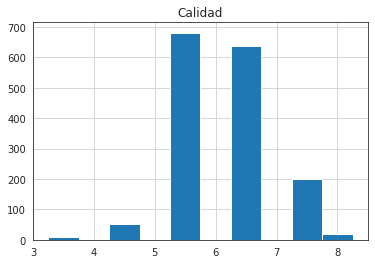

In [13]:
plt.hist(data["quality"], align = "right")
plt.title("Calidad")
plt.grid()
plt.show()

In [17]:
# miremos ela conjunto de datos a través de las calidades
data.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


**Normalización**

In [18]:
data_norm = (data-data.min())/(data.max()-data.min())
data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


**Clustering jerárquico**

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
clus = AgglomerativeClustering(n_clusters = 6, linkage = "ward").fit(data_norm)

In [41]:
#etiquetas
md_h = pd.Series(clus.labels_)
md_h.unique()

array([2, 3, 1, 4, 5, 0])

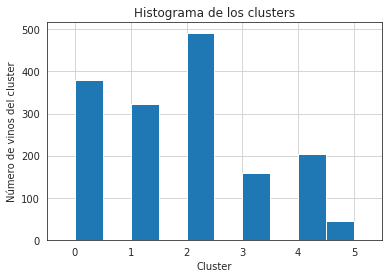

In [43]:
plt.hist(md_h, align = "mid")
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")
plt.xlim(-0.5,5.5)
plt.grid()
plt.show()


In [44]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [46]:
z = linkage(data_norm, "ward")

In [48]:
def dendrogram_tune(*args, **kwargs):  
    
    max_d=kwargs.pop("max_d", None) 
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    plt.figure(figsize=(16,8))
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

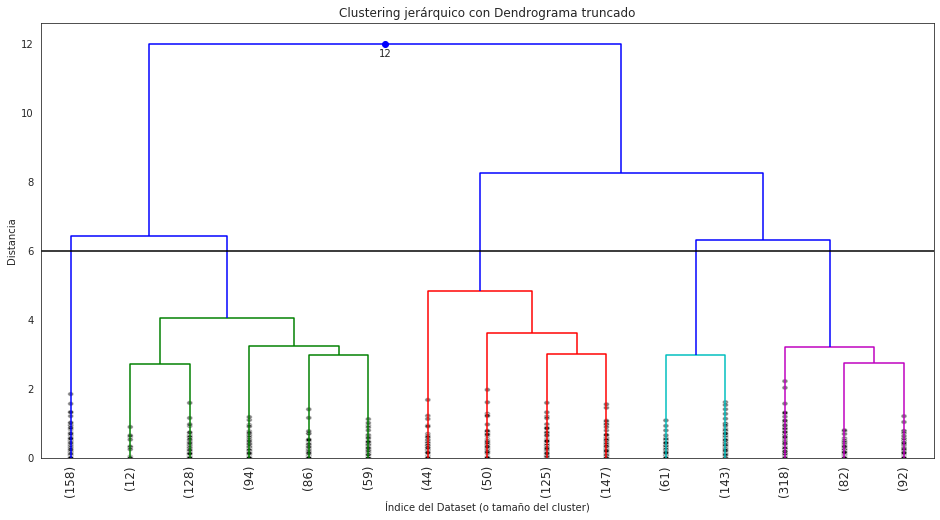

In [60]:
dendrogram_tune(z,truncate_mode='lastp',p=15, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=6)
plt.show()

**K-means**

In [61]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [62]:
model = KMeans(n_clusters = 6, init="k-means++", max_iter=300, n_init=10)
model.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
model.labels_

array([4, 4, 4, ..., 2, 2, 5], dtype=int32)

In [65]:
md_k = pd.Series(model.labels_)

In [67]:
data_norm["clust_h"] = md_h
data_norm["clust_k"] = md_k
data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4


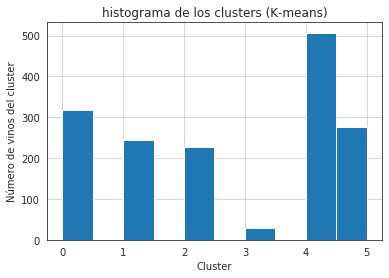

In [69]:
plt.hist(md_k)
plt.title("histograma de los clusters (K-means)")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")
plt.grid()
plt.show()

In [70]:
# interpretación final

data_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.317053,0.279896,0.302390,0.151719,0.127041,0.377846,0.296064,0.540192,0.435943,0.177927,0.212272,0.452201,1.056604
1,0.583059,0.207562,0.509265,0.132457,0.131123,0.135039,0.090618,0.656621,0.330580,0.222608,0.288142,0.544490,2.081633
2,0.174642,0.322888,0.094646,0.093648,0.095823,0.250374,0.125895,0.322343,0.577834,0.185814,0.491105,0.613274,3.415929
3,0.332491,0.285225,0.497857,0.072652,0.550083,0.217807,0.217945,0.513059,0.230034,0.601796,0.155495,0.464286,5.000000
4,0.262921,0.359467,0.118659,0.091601,0.123305,0.144415,0.106809,0.490620,0.486776,0.155311,0.221206,0.441815,2.023669
5,0.365792,0.158468,0.424982,0.105978,0.106748,0.166761,0.085795,0.419036,0.420415,0.238149,0.480224,0.691636,0.116364
